In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv("./dataset/my_train_features.csv")
df_test = pd.read_csv("./dataset/my_test_features.csv")

In [3]:
df_train.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1307.2,straight,small,Agreeableness
1,backward,upperside,932.0,right,small,Agreeableness
2,forward,upperside,891.4,straight,small,Agreeableness
3,forward,upperside,279.6,straight,small,Agreeableness
4,vertical,upperside,766.0,straight,small,Agreeableness


In [4]:
df_test.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1197.3,left,small,Agreeableness
1,vertical,baseline,706.1,right,small,Agreeableness
2,backward,upperside,1604.0,right,small,Agreeableness
3,vertical,lowerside,1214.3,right,medium,Agreeableness
4,backward,upperside,1046.6,left,small,Agreeableness


In [5]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [6]:
df_train["letter_slant"] = df_train["letter_slant"].map(letter_slant_mapping)
df_train["line_slant"] = df_train["line_slant"].map(line_slant_mapping)
df_train["margin_slope"] = df_train["margin_slope"].map(margin_slope_mapping)
df_train["word_spacing"] = df_train["word_spacing"].map(word_spacing_mapping)
df_test["letter_slant"] = df_test["letter_slant"].map(letter_slant_mapping)
df_test["line_slant"] = df_test["line_slant"].map(line_slant_mapping)
df_test["margin_slope"] = df_test["margin_slope"].map(margin_slope_mapping)
df_test["word_spacing"] = df_test["word_spacing"].map(word_spacing_mapping)

In [7]:
df_train.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1307.2,0,-1,Agreeableness
1,-1,1,932.0,1,-1,Agreeableness
2,1,1,891.4,0,-1,Agreeableness
3,1,1,279.6,0,-1,Agreeableness
4,0,1,766.0,0,-1,Agreeableness


In [8]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     int64  
 1   line_slant    44 non-null     int64  
 2   letter_size   44 non-null     float64
 3   margin_slope  44 non-null     int64  
 4   word_spacing  44 non-null     int64  
 5   personality   44 non-null     object 
dtypes: float64(1), int64(4), object(1)

In [9]:
df_train.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [10]:
df_test.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [11]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    int64  
 1   line_slant    177 non-null    int64  
 2   letter_size   177 non-null    float64
 3   margin_slope  177 non-null    int64  
 4   word_spacing  177 non-null    int64  
 5   personality   177 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     int64  
 1   line_slant    44 non-null     int64  
 2   letter_size   44 non-null     float64
 3   margin_slope  44 non-null     int64  
 4   word_spacing  44 non-null     int64  
 5   personality   44 non-null     object 
dtypes: float64(1), int64(4), object(1)

In [13]:
x_train = df_train.drop('personality', axis=1)
y_train = df_train['personality']
x_test = df_test.drop('personality', axis=1)
y_test = df_test['personality']

In [14]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x_train)

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal value of k: {optimal_k}")

Optimal value of k: 42


In [31]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, algorithm="brute")
knn_res = knn.fit(x_train, y_train)

In [32]:
y_pred = knn.predict(x_test)
print(y_pred)

['Openness' 'Openness' 'Agreeableness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Openness']


In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4318181818181818

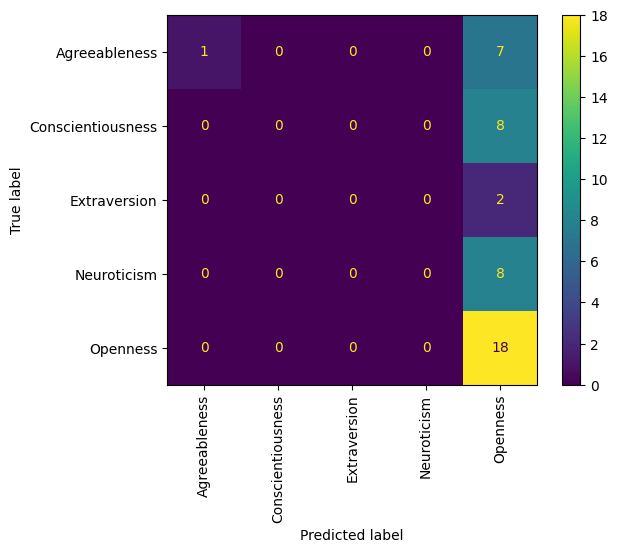

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(xticks_rotation="vertical")

In [20]:
x_test.head(2)

,letter_slant,line_slant,letter_size,margin_slope,word_spacing
0,-1,1,1197.3,-1,-1
1,0,0,706.1,1,-1


In [21]:
from package.features import *
import cv2
from matplotlib import pyplot as plt

In [22]:
# image_path = input("Enter image path: ")

In [23]:
# img = cv2.imread(image_path)
# plt.imshow(img)

In [24]:
# img = auto_crop_image(image_path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 3)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
# dilate = cv2.dilate(thresh, (5, 5), iterations=10)
# plt.imshow(gray, cmap="gray")

In [25]:
# mydataset = {
#     'letter_slant': [get_letter_slant(image_path=image_path)[0]],
#     'line_slant': [get_line_slant(image_path=image_path)[0]],
#     'letter_size': [get_letter_size(image_path=image_path)[0]],
#     'margin_slope': [get_margin_slope(image_path=image_path)[0]],
#     'word_spacing': [gap_between_words(image_path=image_path)[0]],
# }
# my_df = pd.DataFrame(mydataset)
# my_df["letter_slant"] = my_df["letter_slant"].map(letter_slant_mapping)
# my_df["line_slant"] = my_df["line_slant"].map(line_slant_mapping)
# my_df["margin_slope"] = my_df["margin_slope"].map(margin_slope_mapping)
# my_df["word_spacing"] = my_df["word_spacing"].map(word_spacing_mapping)
# my_df

In [26]:
# my_pred = knn.predict(my_df)
# my_pred